# Angular velocity in 3D movements

> Renato Naville Watanabe  
> Laboratory of Biomechanics and Motor Control ([http://pesquisa.ufabc.edu.br/bmclab](http://pesquisa.ufabc.edu.br/bmclab))  
> Federal University of ABC, Brazil

An usual problem found in Biomechanics (and Mechanics in general) is to find the angular velocity of an object. We consider that a basis <span class="notranslate">
$\hat{\boldsymbol e_1}$, $\hat{\boldsymbol  e_2}$</span> and  <span class="notranslate">$\hat{\boldsymbol  e_3}$</span> is attached to the body and is known. To learn how to find a basis of a frame of reference, see [this notebook](https://nbviewer.jupyter.org/github/BMClab/bmc/blob/master/notebooks/ReferenceFrame.ipynb).

![ref](../images/3DbodyrefMove.png)

## Axis of rotation

As in the planar movement, the angular velocity is a vector perpendicular to the rotation. The line in the direction of the angular velocity vector is known as the axis of rotation. 

The rotation beween two frames of reference is characterized by the rotation matrix $R$ obtained by stacking the versors  <span class="notranslate">$\hat{\boldsymbol e_1}$, $\hat{\boldsymbol e_2}$</span> and  <span class="notranslate">$\hat{\boldsymbol e_3}$</span> in each column of the matrix (for a revision on rotation matrices see [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation2D.ipynb) and [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation3D.ipynb) notebooks). 

A vector in the direction of the axis of rotation is a vector that does not changes the position after the rotation. That is:

 <span class="notranslate">
\begin{equation}
v = Rv
\end{equation}
</span>


This vector is the eigenvector of the rotation matrix  <span class="notranslate">$R$</span> with eigenvalue equal to one.  

Below the yellow arrow indicates the axis of rotation of the rotation between the position of the reference frame   <span class="notranslate">$\hat{\boldsymbol i}$, $\hat{\boldsymbol j}$</span> and  <span class="notranslate">$\hat{\boldsymbol k}$</span> and the reference frame of  <span class="notranslate">$\hat{\boldsymbol e_1}$, $\hat{\boldsymbol e_2}$</span> and  <span class="notranslate">$\hat{\boldsymbol e_3}$</span>.

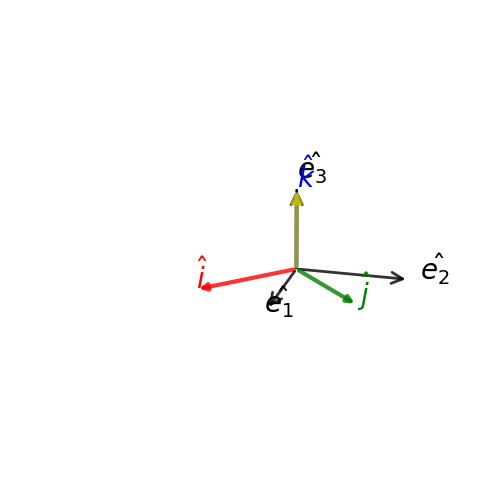

In [4]:
from IPython.display import Math, display
import matplotlib.pyplot as plt
import ipympl
import sympy as sym
import sys
sys.path.insert(1, r'../functions')  # add to pythonpath
%matplotlib widget
from CCSbasis import CCSbasis
import numpy as np


a, b, g = sym.symbols('alpha, beta, gamma')

# Elemental rotation matrices of xyz in relation to XYZ:
RX = sym.Matrix([[1, 0, 0], [0, sym.cos(a), -sym.sin(a)], [0, sym.sin(a), sym.cos(a)]])
RY = sym.Matrix([[sym.cos(b), 0, sym.sin(b)], [0, 1, 0], [-sym.sin(b), 0, sym.cos(b)]])
RZ = sym.Matrix([[sym.cos(g), -sym.sin(g), 0], [sym.sin(g), sym.cos(g), 0], [0, 0, 1]])

# Rotation matrix of xyz in relation to XYZ:
R = RY@RX@RZ
R = sym.lambdify((a, b, g), R, 'numpy')

alpha = 0*np.pi/4
beta = 0*np.pi/4
gamma = np.pi/4

R = R(alpha, beta, gamma)

e1 = np.array([[1,0,0]])
e2 = np.array([[0,1,0]])
e3 = np.array([[0,0,1]])

basis = np.vstack((e1,e2,e3))
basisRot = R@basis
lv, v = np.linalg.eig(R)

axisOfRotation = [np.real(np.squeeze(v[:,np.isclose(lv,1)]))]


CCSbasis(Oijk=np.array([0,0,0]), Oxyz=np.array([0,0,0]), ijk=basis.T, xyz=basisRot.T, 
         vector=True, point = axisOfRotation)


## Computing the angular velocity

The angular velocity $\vec{\boldsymbol\omega}$ is in the direction of the axis of rotation (hence it is parallel to the axis of rotation) and can be described in the basis fixed in the body:

<span class="notranslate">
\begin{equation}
    \vec{\boldsymbol{\omega}} = \omega_1\hat{\boldsymbol{e_1}} + \omega_2\hat{\boldsymbol{e_2}} + \omega_3\hat{\boldsymbol{e_3}}  
\end{equation}
</span>

So, we must find  <span class="notranslate">$\omega_1$, $\omega_2$</span> and  <span class="notranslate">$\omega_3$</span>.

First we will express the angular velocity  <span class="notranslate">$\vec{\boldsymbol{\omega}}$</span> in  terms of these derivatives. 

Remember that the angular velocity is described as a vector in the orthogonal plane of the rotation. (<span class="notranslate">$\vec{\boldsymbol{\omega_1}} = \frac{d\theta_1}{dt}\hat{\boldsymbol{e_1}}$, $\vec{\boldsymbol{\omega_2}} = \frac{d\theta_2}{dt}\hat{\boldsymbol{e_2}}$</span> and  <span class="notranslate">$\vec{\boldsymbol{\omega_3}} = \frac{d\theta_3}{dt}\hat{\boldsymbol{e_3}}$</span>). 

Note also that the derivative of the angle  <span class="notranslate">$\theta_1$</span> can be described as the projection of the vector  <span class="notranslate">$\frac{d\hat{\boldsymbol{e_2}}}{dt}$</span> on the vector  <span class="notranslate">$\hat{\boldsymbol{e_3}}$</span>. 

This can be written by using the scalar product between these vectors:  <span class="notranslate">$\frac{d\theta_1}{dt} = \frac{d\hat{\boldsymbol{e_2}}}{dt}\cdot \hat{\boldsymbol{e_3}}$</span>. 

![versor](../images/derivVersor.png)
    
    

Similarly, the same is valid for the angles in the other two directions:  <span class="notranslate">$\frac{d\theta_2}{dt} = \frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}$</span> and  <span class="notranslate">$\frac{d\theta_3}{dt} = \frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}$</span>.


So, we can write the angular velocity as:

 <span class="notranslate">
\begin{equation}
    \vec{\boldsymbol{\omega}} =  \left(\frac{d\hat{\boldsymbol{e_2}}}{dt}\cdot \hat{\boldsymbol{e_3}}\right) \hat{\boldsymbol{e_1}} + \left(\frac{d\hat{\boldsymbol{e_3}}}{dt}\cdot \hat{\boldsymbol{e_1}}\right) \hat{\boldsymbol{e_2}} + \left(\frac{d\hat{\boldsymbol{e_1}}}{dt}\cdot \hat{\boldsymbol{e_2}}\right) \hat{\boldsymbol{e_3}}
\end{equation}
</span>

Note that the angular velocity $\vec{\boldsymbol\omega}$ is expressed in the reference frame of the object. If you want it described as a linear combination of the versors of the global basis $\hat{\boldsymbol{i}}$, $\hat{\boldsymbol{j}}$ and $\hat{\boldsymbol{k}}$, just multiply the vector $\vec{\boldsymbol\omega}$ by the rotation matrix formed by stacking each versor in a column of the rotation matrix (for a revision on rotation matrices see [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation2D.ipynb) and [this](https://nbviewer.jupyter.org/github/bmclab/bmc/blob/master/notebooks/Transformation3D.ipynb) notebooks).

### 1 ) 3D pendulum bar

At the file '../data/3Dpendulum.txt' there are 3 seconds of data of 3 points of a three-dimensional cylindrical pendulum. It can move in every direction and has a motor at the upper part of the cylindrical bar producing torques to move the bar. 
 
The point m1 is at the upper part of the cylinder and is the origin of the system. 
 
The point m2 is at the center of mass of the cylinder. 
 
The point m3 is a point at the surface of the cylinder. 

Below we compute its angular velocity.

First we load the file.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, suppress=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data = np.loadtxt('../data/3dPendulum.txt', skiprows=1, delimiter = ',')

And separate each mark in a variable.

In [6]:
t = data[:,0]
m1 = data[:,1:4]
m2 = data[:,4:7]
m3 = data[:,7:]
dt = t[1]

Now, we form the basis  <span class="notranslate">$\hat{\boldsymbol e_1}$, $\hat{\boldsymbol e_2}$</span> and  <span class="notranslate">$\hat{\boldsymbol e_3}$</span>.

In [10]:
V1 = m2 - m1
e1 = V1/np.linalg.norm(V1,axis=1,keepdims=True)

V2 = m3-m2

V3 = np.cross(V2,V1)
e2 = V3/np.linalg.norm(V3,axis=1,keepdims=True)

e3 = np.cross(e1,e2)

Below, we compute the derivative of each of the versors.

In [12]:
de1dt = np.gradient(e1, dt, axis=0)
de2dt = np.gradient(e2, dt, axis=0)
de3dt = np.gradient(e3, dt, axis=0)

Here we compute each of the components  <span class="notranslate">$\omega_1$, $\omega_2$</span> and  <span class="notranslate">$\omega_3$</span> of the angular velocity  <span class="notranslate">$\vec{\boldsymbol \omega}$</span> by using the scalar product.

In [13]:
omega1 = np.sum(de2dt*e3, axis = 1, keepdims=True)
omega2 = np.sum(de3dt*e1, axis = 1, keepdims=True)
omega3 = np.sum(de1dt*e2, axis = 1, keepdims=True)

Finally, the angular velocity vector  <span class="notranslate">$\vec{\boldsymbol \omega}$</span> is formed by stacking the three components together.

In [14]:
omega = np.hstack((omega1, omega2, omega3))

## Problems

1) Initially, the lateral malleolus, medial malleolus, fibular head and medial condyle of the leg have the following positions (described in the laboratory coordinate system with coordinates  𝑥,𝑦,𝑧  in cm, the  𝑥  axis points forward and the  𝑦  axes points upward): lateral malleolus (lm = [2.92, 10.10, 18.85]), medial malleolus (mm = [2.71, 10.22, 26.52]), fibular head (fh = [5.05, 41.90, 15.41]), and medial condyle (mc = [8.29, 41.88, 26.52]). After 0.05 seconds the markers have the following positions: lateral malleolus (lm = [2.95, 10.19, 18.41]), medial malleolus (mm = [3.16, 10.04, 26.10]), fibular head (fh = [4.57, 42.13, 15.97]), and medial condyle (mc = [8.42, 41.76, 26.90]). 

Find the angular velocity of of the leg.

## References


- Kane T, Levinson D (1985) [Dynamics: Theory and Applications](https://ecommons.cornell.edu/handle/1813/638). McGraw-Hill, Inc
